In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("data.txt")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.shape

(22, 3)

In [8]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [9]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


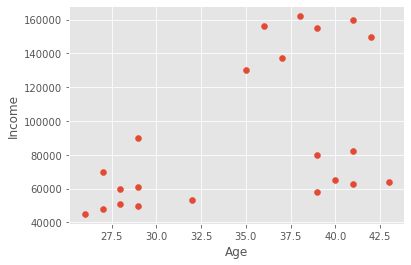

In [19]:
plt.scatter(x=df["Age"],y=df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [35]:
from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
df["Age"]= scaler.fit_transform(df[["Age"]])
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [39]:
x = df[["Age" , "Income($)"]]
x.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [41]:
from sklearn.cluster import KMeans

wcss=[]

k_rng = range(1,11)
for  i in k_rng :
    kmeans = KMeans(n_clusters=i,init = "k-means++",max_iter=300,n_init=10,random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss
    

C:\Users\AKSHAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988178,
 2.091136388699077,
 0.4750783498553095,
 0.3491047094419566,
 0.26217927623452125,
 0.21878010893330443,
 0.16858512236029763,
 0.13265419827245165,
 0.10497488680620909,
 0.0851091521636135]

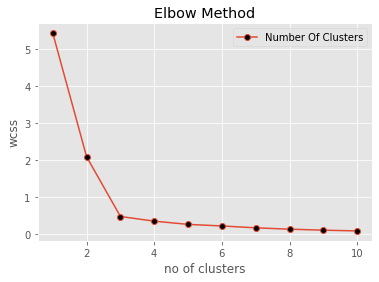

In [42]:
plt.plot(k_rng,wcss , marker='o' ,  markerfacecolor='black')
plt.title('Elbow Method')
plt.xlabel('no of clusters')
labels = ["Number Of Clusters" , "Wcss"]
plt.ylabel('wcss')  # Within cluster sum of squares   #wcss is low for higher no. of clusters
plt.legend(labels=labels)
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
clusters = kmeans.fit_predict(x)
clusters

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [44]:
df["cluster"] = clusters

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [46]:
kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

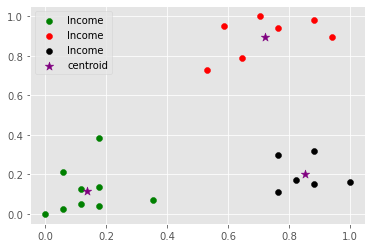

In [58]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label = "Income")
plt.scatter(df2.Age,df2['Income($)'],color='red',label = "Income")
plt.scatter(df3.Age,df3['Income($)'],color='black',label = "Income")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',s=80,label='centroid')
plt.legend()
plt.show()